In [1]:
# Import necessary libraries
import pandas as pd
import json
from pathlib import Path

In [2]:
# Define the base path for the data
data_path = Path('../data/raw')

# Load accelerometer data
with open(data_path / 'player_107631_accelerometer.json', 'r') as f:
    accel_data = json.load(f)
accel_df = pd.DataFrame(accel_data)
print("Accelerometer data shape:", accel_df.shape)
accel_df.head()

Accelerometer data shape: (1232770, 6)


,ts,x,y,z,activity_id,activity_date
0,1745804266692,-0.181855,-0.244068,9.659825,3312957,1745804326000
1,1745804266704,-0.191426,-0.279960,9.731609,3312957,1745804326000
2,1745804266706,-0.172283,-0.244068,9.667004,3312957,1745804326000
3,1745804266707,-0.165105,-0.277567,9.707682,3312957,1745804326000
4,1745804266707,-0.244068,-0.248854,9.714860,3312957,1745804326000


In [3]:
# Load heartrate data
with open(data_path / 'player_107631_heartrate.json', 'r') as f:
    heartrate_data = json.load(f)
heartrate_df = pd.DataFrame(heartrate_data)
print("Heartrate data shape:", heartrate_df.shape)
heartrate_df.head()

Heartrate data shape: (499047, 5)


,ts,hr,pp,activity_id,activity_date
0,1745804267223,-3,0,3312958,1745804326000
1,1745804267303,-3,0,3312958,1745804326000
2,1745804267382,-3,0,3312958,1745804326000
3,1745804267463,-3,0,3312958,1745804326000
4,1745804267543,-3,0,3312958,1745804326000


In [4]:
# Load location data
with open(data_path / 'player_107631_location.json', 'r') as f:
    location_data = json.load(f)
location_df = pd.DataFrame(location_data)
print("Location data shape:", location_df.shape)
location_df.head()

Location data shape: (9853, 10)


,LATITUDE,LONGITUDE,ALTIDUDE,SPEED,ERROR,TIMESTAMP,ARM,activity_id,date,gameDescriptor
0,52.09715270996094,5.109695911407471,32.20000076293945,3.852000188827515,29,1745804145,Arm 2,3312956,1745804205000,GEOFENCE
1,52.09716796875,5.109516143798828,33.70000076293945,0,21,1745804085,Arm 2,3312955,1745804145000,GEOFENCE
2,52.09715270996094,5.109503746032715,32.09999847412109,2.016000008583069,19,1745804025,Arm 2,3312953,1745804085000,GEOFENCE
3,52.09713745117188,5.109537601470947,28.10000038146973,0,17,1745803965,Arm 2,3312952,1745804025000,GEOFENCE
4,52.09712219238281,5.109561443328857,18.89999961853027,0,19,1745803905,Arm 2,3312951,1745803965000,GEOFENCE


In [8]:
# Convert timestamp to datetime for all dataframes
accel_df['ts'] = pd.to_datetime(accel_df['ts'], unit='ms')
heartrate_df['ts'] = pd.to_datetime(heartrate_df['ts'], unit='ms')
location_df['TIMESTAMP'] = pd.to_datetime(location_df['TIMESTAMP'], unit='ms')

# Display the first few rows of each dataframe to verify the conversion
print("Accelerometer data with datetime:")
print(accel_df.head())
print("\nHeartrate data with datetime:")
print(heartrate_df.head())
print("\nLocation data with datetime:")
print(location_df.head())

Accelerometer data with datetime:
                       ts         x         y         z  activity_id  \
0 2025-04-28 01:37:46.692 -0.181855 -0.244068  9.659825      3312957   
1 2025-04-28 01:37:46.704 -0.191426 -0.279960  9.731609      3312957   
2 2025-04-28 01:37:46.706 -0.172283 -0.244068  9.667004      3312957   
3 2025-04-28 01:37:46.707 -0.165105 -0.277567  9.707682      3312957   
4 2025-04-28 01:37:46.707 -0.244068 -0.248854  9.714860      3312957   

   activity_date  
0  1745804326000  
1  1745804326000  
2  1745804326000  
3  1745804326000  
4  1745804326000  

Heartrate data with datetime:
                       ts  hr  pp  activity_id  activity_date
0 2025-04-28 01:37:47.223  -3   0      3312958  1745804326000
1 2025-04-28 01:37:47.303  -3   0      3312958  1745804326000
2 2025-04-28 01:37:47.382  -3   0      3312958  1745804326000
3 2025-04-28 01:37:47.463  -3   0      3312958  1745804326000
4 2025-04-28 01:37:47.543  -3   0      3312958  1745804326000

Location data w

C:\Users\20236075\AppData\Local\Temp\ipykernel_31352\40127691.py:4: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  location_df['TIMESTAMP'] = pd.to_datetime(location_df['TIMESTAMP'], unit='ms')


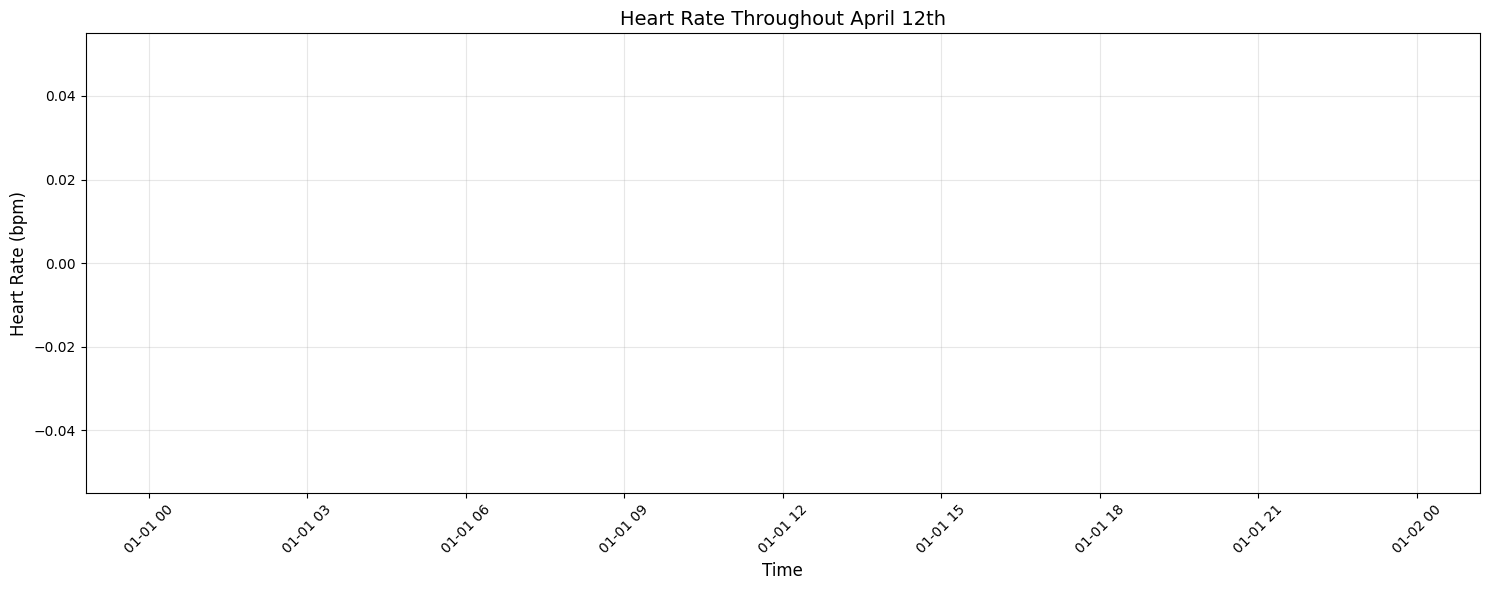


Statistics for April 12th:
Number of measurements: 0
Average heart rate: nan bpm
Minimum heart rate: nan bpm
Maximum heart rate: nan bpm


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a standard matplotlib style
plt.style.use('default')

# Filter data for April 12th
april_12_data = heartrate_df[heartrate_df['ts'].dt.date == pd.Timestamp('2024-04-12').date()]

# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(april_12_data['ts'], april_12_data['hr'], marker='o', markersize=2, linestyle='-', linewidth=1)

# Customize the plot
plt.title('Heart Rate Throughout April 12th', fontsize=14)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Heart Rate (bpm)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print some basic statistics for the day
print(f"\nStatistics for April 12th:")
print(f"Number of measurements: {len(april_12_data)}")
print(f"Average heart rate: {april_12_data['hr'].mean():.2f} bpm")
print(f"Minimum heart rate: {april_12_data['hr'].min():.2f} bpm")
print(f"Maximum heart rate: {april_12_data['hr'].max():.2f} bpm")